<a href="https://colab.research.google.com/github/mertkaya13/Forestfires-Prediction-with-Machine-Learning/blob/master/Forestfires_prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project aims to predict forestfires with the help of Machine Learning by given estimated values of temperature,amount of rain,speed of the wind etc.

There are predicters created for various usages.

Which would help us predict a forestfire according to the dataset.
I have created four different versions by the following steps you can see below.

First predicter uses values that are more common for everday people such as temperature,amount of rain,speed of wind as such.
These values can be gathered from various websites or other places(eg. Newspapers) because they are predicted daily,weekly,monthly by meteorology companies.

Second predicter is a more complicated version which uses FWI values.
More info about FWI can be found in ' https://www.nwcg.gov/publications/pms437/cffdrs/fire-weather-index-system '. We will not use the X and Y values for a general prediction of a forest fire.

Third predicter uses all of the features except FWI values of the dataset. This predicter can be used to achieve the amount of fire as hectars on a part of the forest.It can be used to understand importance of the part that forestfire happens(Middle of the forest may be more flammable than other parts.)

Fourth Predicter uses all of the features except the categorical ones.

After creating these predictors it became clear that categorical predictor would be more useful and effective. We can use the dayofweek and month values.
To create a predictor like this one amount of hectars value must be turned into a categorical one.:

0-10 : really small Forest Fire or no Forest Fire

10-45: Small Forest Fire

45-150 : Medium Sized Forest Fire

150-300 : Large Sized Forest Fire

Numbers bigger than 300 : Really Large Forest Fire 






First of all we need to show the source of our dataset.


Citation Request:
  This dataset is public available for research. The details are described in [Cortez and Morais, 2007]. 
  Please include this citation if you plan to use this database:

  P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. 
  In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, 
  Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, 
  Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. 
  Available at: http://www.dsi.uminho.pt/~pcortez/fires.pdf



  Our dataset is combined from two different datasets.
  Former is data collected from Montesinhonatural park.
  The data used in the experiments was collected from January 2000 to    December 2003. It containes month,day of week, spatial location within a 9×9 grid and the six components of the FWI systemand the total burned area.
  Latter contains information about the weather at that moment.

  

First we need to import pandas to use our dataset.
Numpy for various calculations and scikit-learn for regression.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Then we use pandas to get the .csv file (Which is the data of dataset) from the link.

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
df = pd.read_csv(url)

This is how our dataset looks like.

In [ ]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


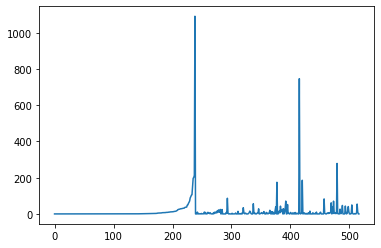

In [ ]:
plt.plot(df['area'])

In [ ]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


We remove the X and Y columns of our dataset. Those values are used to declare which part of the naturalpark the forestfire occured as coordinates.(X,Y)
We will remove FWI values too.
The reason we are using those is to achieve a model to be used on general scale.


In [ ]:
df2 = df.drop(['X', 'Y','FFMC','DMC','DC','ISI','month','day'], axis = 1) 

We cannot use the month and day values because they are categorical and using them in regression would be stating a relation such as tuesday = 2*monday.

Our dataset will look like this.

In [ ]:
df2

,temp,RH,wind,rain,area
0,8.2,51,6.7,0.0,0.00
1,18.0,33,0.9,0.0,0.00
2,14.6,33,1.3,0.0,0.00
3,8.3,97,4.0,0.2,0.00
4,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...
512,27.8,32,2.7,0.0,6.44
513,21.9,71,5.8,0.0,54.29
514,21.2,70,6.7,0.0,11.16
515,25.6,42,4.0,0.0,0.00


We will use the area value as Y(target) value.

In [ ]:
X = df2.drop(columns=['area'])
y = df2['area']

We have splitted the data as %20 train and %80 test.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


We will fit our model with Least Squares Linear Regression.

In [ ]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

To check the accuracy of our model we will use MSE.

In [ ]:
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

Mean Absolute Error: 25.884922040576985



Let's use Ridge Linear Regression.Learning rate as 0.01 is from trial and error.

In [ ]:
ridge_regressor = Ridge(alpha=0.01, fit_intercept=True, normalize=True, copy_X=True, max_iter=10000, tol=0.000001, solver='sag', random_state=None)
ridge_regressor.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=True, random_state=None, solver='sag', tol=1e-06)

In [ ]:
y_ridge_pred = ridge_regressor.predict(X_test)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_ridge_pred))  

Mean Absolute Error: 25.881022258581297


Let's check the accuracy for Lasso Linear Regression.

In [ ]:
lasso_regressor =  Lasso(alpha=0.1, fit_intercept=True, normalize=False, precompute=False, copy_X=True, warm_start=False, positive=False, random_state=None, selection='cyclic')
lasso_regressor.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
y_lasso_pred = lasso_regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_lasso_pred))  

Mean Absolute Error: 25.88306534228093


Let's check the knn regression too.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
kneigh_pred = knn_regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, kneigh_pred))  

Mean Absolute Error: 26.909384615384617


Created the residual plot to check linearity.


In [ ]:
residuals = []
for i in range(len(y_ridge_pred)):
  residuals.append(y_test.values[i] - y_ridge_pred[i])

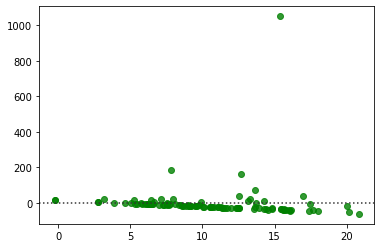

In [ ]:
sns.residplot(x=y_ridge_pred , y=residuals , data='auto', color='green')

# Display the plot
plt.show()


To check the predictions of the models ,
You can enter the inputs for todays and check the values.
inputs : 
RH - relative humidity in %: 15.0 to 100
wind - wind speed in km/h: 0.40 to 9.40
rain - outside rain in mm/m2 : 0.0 to 6.4
area - the burned area of the forest (in ha): 0.00 to 1090.84 

From the runtime section above press run-all button.

Some clarification about the output values:

-Data is somewhat linear which means that KNN Regression will not provide a great answer.
-Lasso Regression gets the absolute value of each weight which adds tendency to output bigger values.

In [ ]:
 
 
#@title Regression Predictions for Burned Area of Forest in a Forest Fire 
 
Celcius_Temperature = 1000.0 #@param {type:"number"}
Relative_Humidity = 60.0 #@param {type:"number"}
Wind = 10.0 #@param {type:"number"}
Rain =  0#@param {type:"number"}
 
value_array = [Celcius_Temperature,Relative_Humidity,Wind,Rain]
value_array = np.array(value_array).reshape(1,-1)


area_burned = regressor.predict(value_array)
if (area_burned < 0 ):
  area_burned = 0


area_burned_ridge = ridge_regressor.predict(value_array)
if (area_burned_ridge < 0 ):
  area_burned_ridge = 0


area_burned_lasso = lasso_regressor.predict(value_array)
if (area_burned_lasso < 0 ):
  area_burned_lasso = 0


area_knn_regressor = knn_regressor.predict(value_array)
if (area_knn_regressor < 0 ):
  area_knn_regressor = 0
 
 
 
print("Predicted value for burned area is (According to machine learning model trained with :Ordinary least squares linear regression) : ",area_burned)
print("Predicted value for burned area is (According to machine learning model trained with :Ridge linear regression) : ",area_burned_ridge)
print("Predicted value for burned area is (According to machine learning model trained with :Lasso linear regression) : ",area_burned_lasso)
print("Predicted value for burned area is (According to machine learning model trained with :KNN regression) : ",area_knn_regressor)

Predicted value for burned area is (According to machine learning model trained with :Ordinary least squares linear regression) :  [721.21232114]
Predicted value for burned area is (According to machine learning model trained with :Ridge linear regression) :  [710.00565651]
Predicted value for burned area is (According to machine learning model trained with :Lasso linear regression) :  [702.8538679]
Predicted value for burned area is (According to machine learning model trained with :KNN regression) :  [8.776]


Let's create similar models for FWI values